In [16]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy import linspace

### Amônia - Isotérmico

In [17]:
R = 8.314  # J/molK
Tc = 405.7  # K
Pc = 112.8*(10**5)  # Pa
T = 373.15 # K
Tr = T/Tc
alfa = 1/(math.sqrt(Tr))
a = (0.42748*alfa*(R**2)*(Tc**2))/Pc  # Pa*(m^3/mol)^2
b = .08664*R*Tc/Pc  # m^3/mol

pressures = []
volumes = linspace(1.8*b,0.0004,200)


### Functions

In [18]:
def initial_value(P) -> int or float:
    return R*T/P


def get_value(P, v) -> int or float:
    return (initial_value(P) + b - ((a*(v-b))/(P*v*(v+b))))


def set_z(P,v) -> int or float:
    return (P*v)/(R*T)


def get_Hr(z,v) -> int or float:
    return R*T*(z - 1 - ((3*a)/(2*b*R*T))*math.log((v+b)/v))


def get_Sr(z,P,v) -> int or float:
    return R*(math.log(z - ((b*P)/(R*T))) - (a/(2*b*R*T))*math.log((v+b)/v))


def RK(v) -> int or float:
    return R*T/(v-b) - a/(v*(v+b))


def get_volume_by_SS(P) -> int or float:
    v = []  # Variavel
    g = []  # Função

    v.append(initial_value(P))
    i = 0
    error = 10  # Valor alto aleatório para setar erro inicial
    tolerance = 10**-100
    safety_loops = 1000

    while error > tolerance and i < safety_loops:

        g.append(get_value(P, v[i]))
        v.append(g[i])
        error = abs(v[i+1] - v[i])
        i += 1

    return v[len(v)-1]

### Propriedades Residuais

In [19]:
Pf = 5*10**6
Pi = 10**5
vf = get_volume_by_SS(Pf)
vi = get_volume_by_SS(Pi)
zi = set_z(Pi,vi)
zf = set_z(Pf,vf)

S1r = get_Sr(zi,Pi,vi)
S2r = get_Sr(zf,Pf,vf)

H1r = get_Hr(zi,vi)
H2r = get_Hr(zf,vf)

delta_S = S2r - S1r - R*math.log(Pf/Pi)
delta_H = H2r - H1r

Q = T*delta_S
W = delta_H - Q


### Diagrama PxV

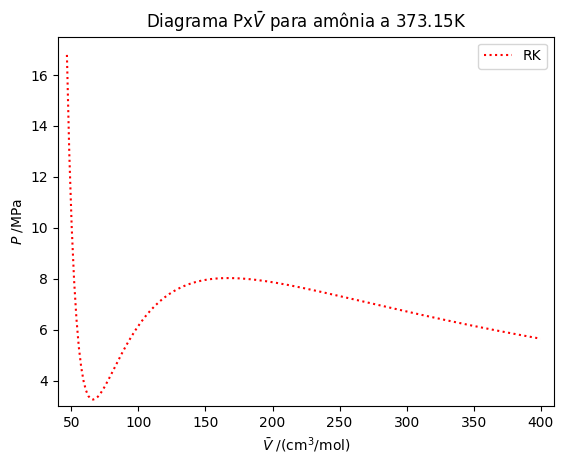

O trabalho realizado pelo compressor foi: W = 11502.36J/mol
Já o calor liberado pelo compressor foi: Q = -13559.21J/mol


In [20]:
for v in volumes:
    pressures.append(RK(v)/1000000)

volumes = volumes*10**6

plt.plot(volumes, pressures,'r', linestyle='dotted')
plt.ylim(3,17.5)
plt.xlim(40,410)
plt.title(r'Diagrama Px$\bar V$ para amônia a 373.15K')
plt.xlabel(r'$\bar V$ /(cm$^3$/mol)')
plt.ylabel(r'$P$ /MPa')
plt.legend(['RK'])
plt.show()

print(f'O trabalho realizado pelo compressor foi: W = {W:.2f}J/mol')
print(f'Já o calor liberado pelo compressor foi: Q = {Q:.2f}J/mol')